## 25-26: 4369 -- PROGRAMMING FOR DATA ANALYTICS  
## Topic 06 :Timeseries and synthetic data   
   
# Assignment 6 Knock airport Weather   
Author:  Niall Naughton  
Date:  02/11/2025  

***
## <font color="crimson">Part 1 60%</font>
Create a notebook called assignment_6_Weather.ipynb  
Get the data from this link.  

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv   

(This is different that the data I used in the lecture)   

Plot:   
*  The temperature  
*  The mean temperature each day  
*  The mean temperature for each month.  

   
Initially look at data in CSV File hly4935.csv ...

In [1]:
#Load CSV data from URL and initially display the first 10 rows
import pandas as pd

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
# The first 24 lines are metadata and should be skipped
df = pd.read_csv(url, skiprows=23)
df.head(10)

C:\Users\Niall\AppData\Local\Temp\ipykernel_38252\281773924.py:6: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
6,31-jul-1996 13:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,0,2,11,0.0,40000,43,5
7,31-jul-1996 14:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,0,2,11,0.0,50000,45,6
8,31-jul-1996 15:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,0,25,82,0.0,8000,45,7
9,31-jul-1996 16:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,0,25,82,0.0,35000,40,7


Columns are as follows (Extracted from file's metadata)

*  date:  -  Date and Time (utc)   
*  rain:  -  Precipitation Amount (mm)	     
*  temp:  -  Air Temperature (C)	   
*  wetb:  -  Wet Bulb Temperature (C)   
*  dewpt: -  Dew Point Temperature (C)                
*  rhum:  -  Relative Humidity (%)   
*  vappr: -  Vapour Pressure (hPa)	    
*  msl:   -  Mean Sea Level Pressure (hPa)   
*  wdsp:  -  Mean Wind Speed (knot)   
*  wddir: -  Predominant Wind Direction (degree)   
*  ww:    -  Synop code for Present Weather   
*  w:     -  Synop code for Past Weather   
*  sun:   -  Sunshine duration (hours)   
*  vis:   -  Visibility (m)   
*  clht:  -  Cloud height (100's of ft) - 999 if none    
*  clamt: -  Cloud amount   
*  ind:   -  Indicator   

There are 3 Temperatures Air,WetBulb, and Dew Point.   
**For this task we will assume "temperature" is the column temp (Air Temperature (C))**   

Lets reload data with only the [date] and [temp] columns   


<font color='crimson'>**Note: Dataset was found to be quite large and took a long time to plot data, so data was filtered by Year**</font>   

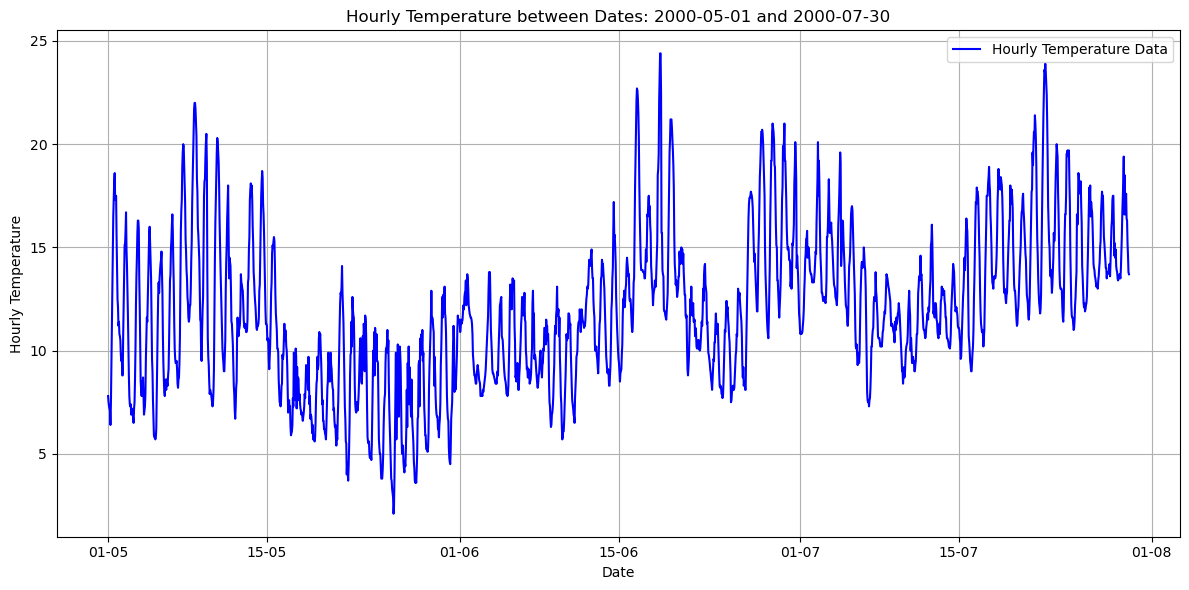

In [2]:
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import calendar

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
columns = ['date','temp']
df = pd.read_csv(url, usecols=columns, skiprows=23)
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

# Filter by specific dates ... Plotting all years is too noisy (Keep data range within 1 month -- or less)
start_date = date(2000,5,1)
end_date = date(2000,7,30)
# Convert to Pandas Timestamp (needed for comparison)
start_ts = pd.Timestamp(start_date)
end_ts   = pd.Timestamp(end_date)

df_filtered = df[(df['date'] >= start_ts) & (df['date'] <= end_ts)]

# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_filtered['date'], df_filtered['temp'], color='blue', label='Hourly Temperature Data')

# Labels & title
ax.set_xlabel('Date')
ax.set_ylabel('Hourly Temperature')
ax.set_title(f'Hourly Temperature between Dates: {start_date} and {end_date}')
# Date format on x-axis
ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))
# Grid, legend, layout
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()

## The Mean Temperature each Day

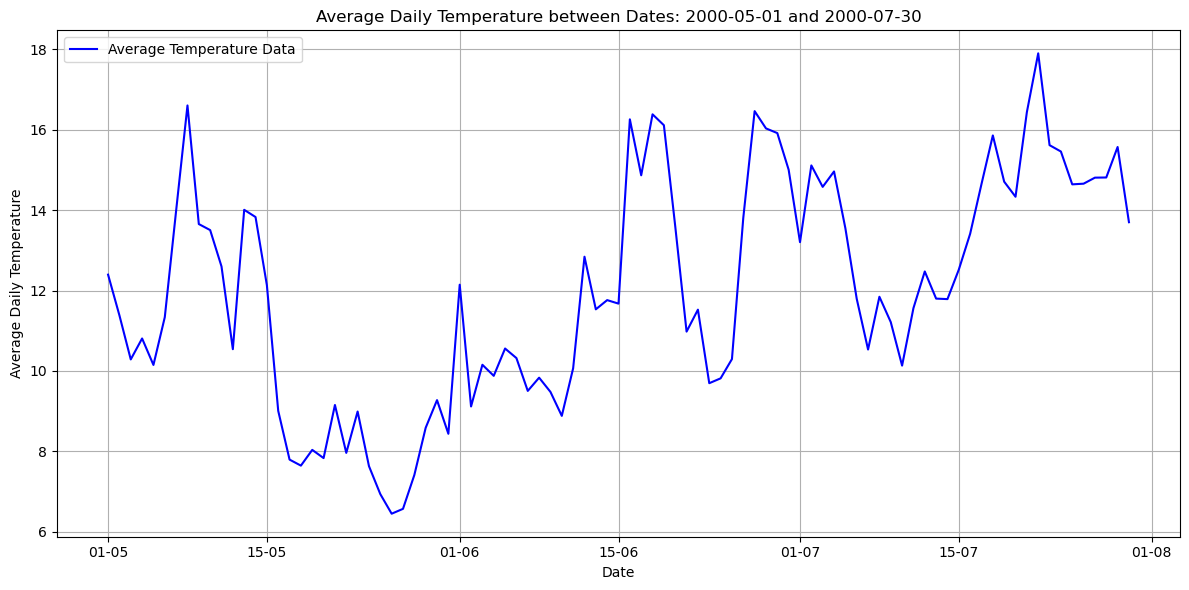

In [3]:
df_daily_mean = df_filtered.groupby(df_filtered['date'].dt.date)['temp'].mean().reset_index()
df_daily_mean.columns = ['date', 'mean_temp']

# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_daily_mean['date'], df_daily_mean['mean_temp'], color='blue', label='Average Temperature Data')

# Labels & title
ax.set_xlabel('Date')
ax.set_ylabel('Average Daily Temperature')
ax.set_title(f'Average Daily Temperature between Dates: {start_date} and {end_date}')
# Date format on x-axis
ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))
# Grid, legend, layout
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()

## The mean temperature for each month.

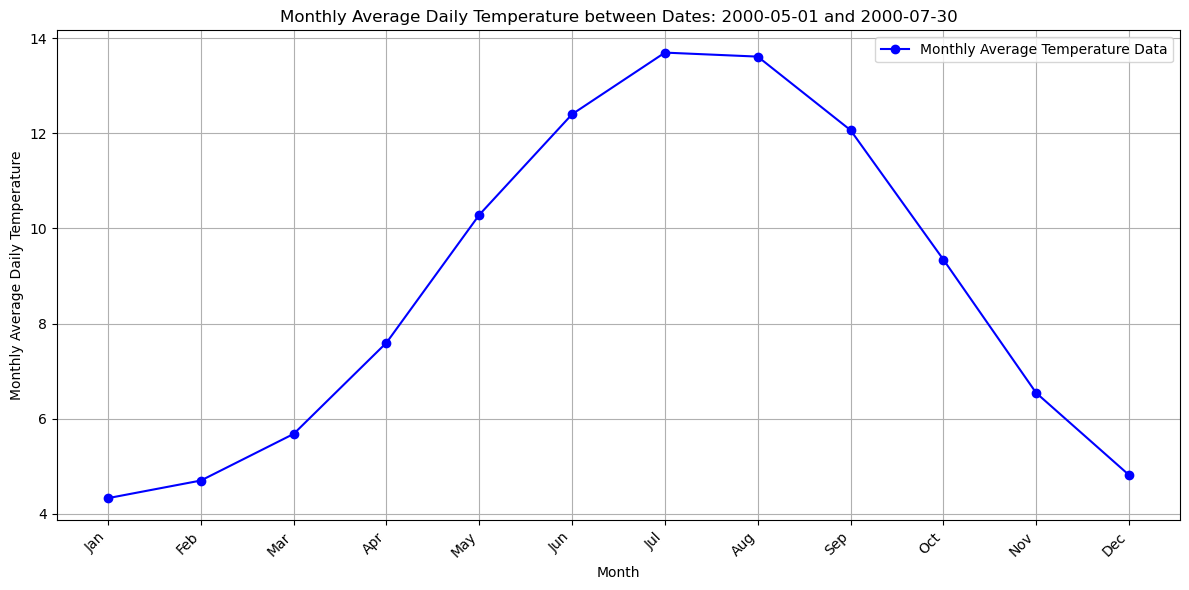

In [4]:
#Since we are looking at monthly averages we can use the full data set
df_monthly_mean = df.groupby(df['date'].dt.month)['temp'].mean().reset_index()
df_monthly_mean.columns = ['month', 'mean_temp']

# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_monthly_mean['month'], df_monthly_mean['mean_temp'], color='blue', label='Monthly Average Temperature Data', marker='o')

# Labels & title
months = df_monthly_mean['month'].tolist()
month_labels = [calendar.month_abbr[m] for m in months]    # use month_name for full name

ax.set_xticks(months)
ax.set_xticklabels(month_labels, rotation=45, ha='right')
# Date format on x-axis
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Average Daily Temperature')
ax.set_title(f'Monthly Average Daily Temperature between Dates: {start_date} and {end_date}')
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()

***
## <font color="crimson">Part 2 40%</font>
Plot:  
  
*  The Windspeed (there is data missing from this column)  
*  The rolling windspeed (say over 24 hours)  
*  The max windspeed for each day  
*  The monthly mean of the daily max windspeeds (yer I am being nasty here)  

You do not need to over comment your code. Marks will be given for how nice the plots are.  




### Observations on Raw Wind Speed Data
After saving a local copy of CSV data, I noted 50 data points with a space (' ') for 'wdsp'  
I found these records by using the Regular Expression search pattern:  
`^(.*)(, )$`  
These 50 records should be updated with a 0.0 value by initially using the **to_numeric()** function.  
Use the ‘coerce’ error flag, then invalid parsing will be set as NaN  
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_numeric.html  
Finally feed the NaN values into **pandas.fillan()** function  
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna  
The script line then becomes :   
`df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce').fillna(0.0)`  

I also noted 411 records with a wind speed of 0.  
There is nothing usually wrong with a wind speed of 0 ... but, the 0 readings are sometimes throughout the whole day or several days (which is highly unusual for Ireland)  
For example :  
* 1999-11-10 18:00 to 1999-11-11 22:00  
* 1996-09-01 01:00 to 1996-09-03 00:00  
* 2020-01-27 20:00 to 2020-01-28 04:00  
*No corrective action was taken on this.*

### Save a local Copy of Data
As a first step, I downloaded a local copy of Wind speed 'wdsp' data in a CSV file for later processing.  
This script corrects for missing 'wdsp' data, replacing value with 0.0

In [5]:

'''
****************************************************************
    Save Wind Speed Data to CSV (to save time re-downloading) 
****************************************************************
'''

import pandas as pd
import seaborn as sns

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
columns = ['date','wdsp']
df = pd.read_csv(url, usecols=columns, skiprows=23) #Large Header, skip first 23 rows
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

# Convert 'wdsp' to numeric, forcing errors to NaN ... and then fill NaN with 0.0
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce').fillna(0.0)

df.to_csv('wind_data.csv', index=False)  # Save to CSV without the index


C:\Users\Niall\AppData\Local\Temp\ipykernel_38252\3781806476.py:12: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, usecols=columns, skiprows=23) #Large Header, skip first 23 rows


### Generate and Save additional Statistical Data Columns 
*  'rolling_wdsp_24h' : The rolling windspeed (say over 24 hours)  
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html  
    https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html#pandas.core.window.rolling.Rolling.mean  
    Find mean() of last rolling 25 wdsp records  `df['rolling_wdsp_24h'] = df['wdsp'].rolling(window=24).mean()`  

*  'daily_max_wdsp' : The max wind speed for each day  
    https://pbpython.com/pandas_transform.html  
    https://medium.com/@stacymacbrains/difference-between-apply-and-transform-in-pandas-a975b018e862  
    I needed the Resulting series has the same length as the original dataframe (as I was feeding into a new column in DF)  
    Here, I needed to use .transform('max') instead of simple .max()
    Group records by 'date' and find Max within Group :  
    `df['daily_max_wdsp'] = df.groupby(df['date'].dt.date)['wdsp'].transform('max')`  

*  'monthly_avgmax_wdsp' : The monthly mean of the daily max windspeeds (yer I am being nasty here)  
    leverage the last Column 'daily_max_wdsp' and find it's mean() ... Group by Month  
    Use the .to_period('M') function of datetime object:  `df.groupby(df['date'].dt.to_period('M'))`   
    But, when extracting mean use .transform('mean') instead of .mean()



In [6]:
import pandas as pd

# Read the CSV (skip the metadata lines at the top)
df = pd.read_csv("wind_data.csv", usecols=['date', 'wdsp'])

# Need to Re-Convert 'date' column back to datetime (after reading from CSV)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

#Add column for : 24 hour rolling mean windspeed
df['rolling_wdsp_24h'] = df['wdsp'].rolling(window=24).mean()

# Add column for : daily maximum windspeed
df['daily_max_wdsp'] = df.groupby(df['date'].dt.date)['wdsp'].transform('max')

# Add column for : Monthly average of daily maximum windspeed
df['monthly_avgmax_wdsp'] = df.groupby(df['date'].dt.to_period('M'))['daily_max_wdsp'].transform('mean')

df.to_csv('wind_data_stats.csv', index=False)  # Save to CSV without the index

### Plot Wind speed data 
Plotting the above data for all years 1996 to 2025 results in a very cluttered chart (that is un-readable)..  
Even plotting a full year's data also makes the plot too busy to interpret.  
The plots also need filtering by dates

So I have added as parameters in below script to filter data
* start_date
* end_date

**Keep data range within 1 month (or less)**

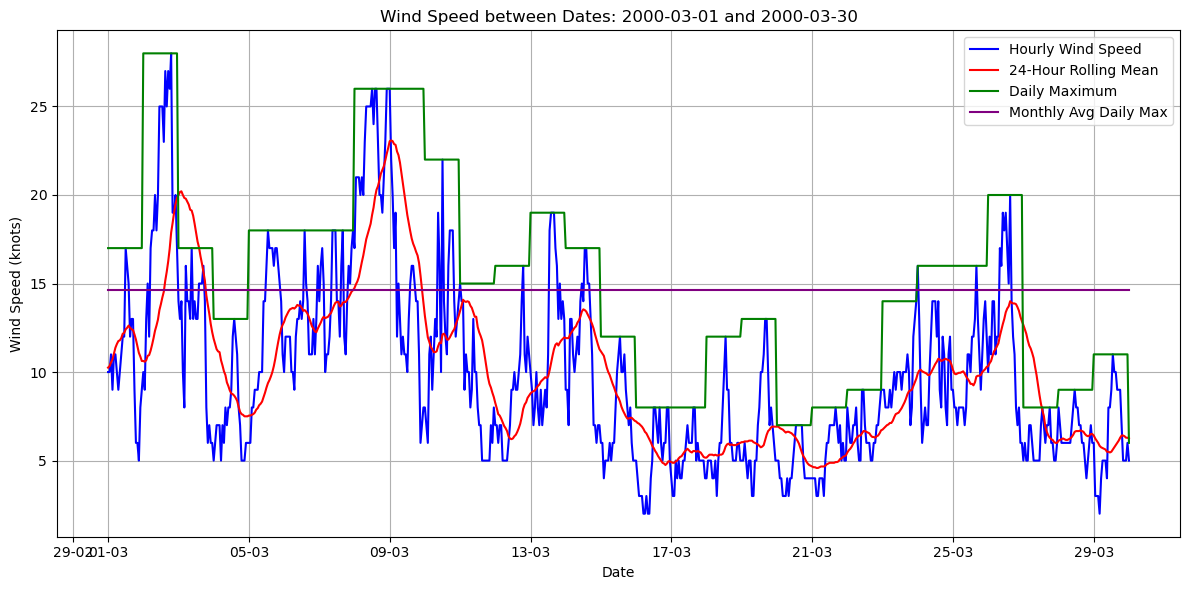

In [7]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# Load CSV
df = pd.read_csv("wind_data_stats.csv")

# Need to Re-Convert 'date' column back to datetime (after reading from CSV)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter by specific dates ... Plotting all years is too noisy (Keep data range within 1 month -- or less)
start_date = date(2000,3,1)
end_date = date(2000,3,30)
# Convert to Pandas Timestamp (needed for comparison)
start_ts = pd.Timestamp(start_date)
end_ts   = pd.Timestamp(end_date)

df_filtered = df[(df['date'] >= start_ts) & (df['date'] <= end_ts)]

# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_filtered['date'], df_filtered['wdsp'], color='blue', label='Hourly Wind Speed')
ax.plot(df_filtered['date'], df_filtered['rolling_wdsp_24h'], color='red', label='24-Hour Rolling Mean')
ax.plot(df_filtered['date'], df_filtered['daily_max_wdsp'], color='green', label='Daily Maximum')
ax.plot(df_filtered['date'], df_filtered['monthly_avgmax_wdsp'], color='purple', label='Monthly Avg Daily Max')
# Labels & title
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (knots)')
ax.set_title(f'Wind Speed between Dates: {start_date} and {end_date}')
# Date format on x-axis
ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))

# Grid, legend, layout
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()